In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/edible_or_not

/gdrive/MyDrive/edible_or_not


In [21]:
ls

mushrooms.csv


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [22]:
df_train=pd.read_csv('mushrooms.csv')
df_train.head()

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   class                  8124 non-null   object
 1   capshape               8124 non-null   object
 2   capsurface             8124 non-null   object
 3   capcolor               8124 non-null   object
 4   bruises                8124 non-null   object
 5   odor                   8124 non-null   object
 6   gillattachment         8124 non-null   object
 7   gillspacing            8124 non-null   object
 8   gillsize               8124 non-null   object
 9   gillcolor              8124 non-null   object
 10  stalkshape             8124 non-null   object
 11  stalkroot              8124 non-null   object
 12  stalksurfaceabovering  8124 non-null   object
 13  stalksurfacebelowring  8124 non-null   object
 14  stalkcolorabovering    8124 non-null   object
 15  stalkcolorbelowring  

In [24]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,stalkroot,stalksurfaceabovering,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# EDA

In [25]:
df_train.isna().sum().sum()

0

In [26]:
df_train.columns

Index(['class', 'capshape', 'capsurface', 'capcolor', 'bruises', 'odor',
       'gillattachment', 'gillspacing', 'gillsize', 'gillcolor', 'stalkshape',
       'stalkroot', 'stalksurfaceabovering', 'stalksurfacebelowring',
       'stalkcolorabovering', 'stalkcolorbelowring', 'veiltype', 'veilcolor',
       'ringnumber', 'ringtype', 'sporeprintcolor', 'population', 'habitat'],
      dtype='object')

In [27]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [28]:
binary_cols

['class', 'bruises', 'gillattachment', 'gillspacing', 'gillsize', 'stalkshape']

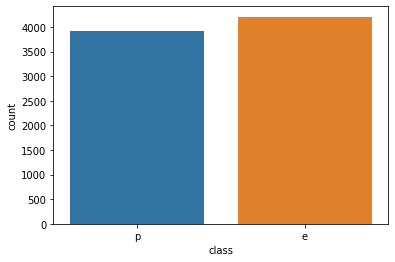

In [14]:
sns.countplot("class", data=df_train)

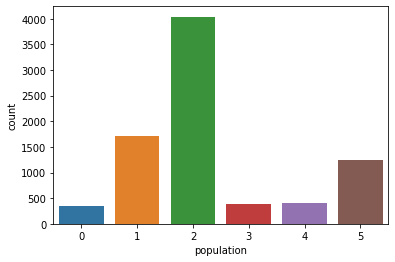

In [77]:
sns.countplot("population", data=df_train) 

In [33]:
capsurface_numeric = {'s':3,'y':2,'f':1,'g':0}
df_train.capsurface.replace(capsurface_numeric, inplace=True)

In [35]:
capcolor_numeric = {'n':9,'y':8,'w':7,'g':6,'e':5,'p':4,'b':3,'u':2,'c':1,'r':0}
df_train.capcolor.replace(capcolor_numeric, inplace=True)

In [38]:
bruises_numeric = {'t':1,'f':0}
df_train.bruises.replace(bruises_numeric, inplace=True)

In [45]:
gillspacing_numeric = {'c':1,'w':0}
df_train.gillspacing.replace(gillspacing_numeric, inplace=True)

In [47]:
gillsize_numeric = {'n':1,'b':0}
df_train.gillsize.replace(gillsize_numeric, inplace=True)

In [51]:
stalkshape_numeric = {'e':1,'t':0}
df_train.stalkshape.replace(stalkshape_numeric, inplace=True)

In [76]:
population_numeric = {'s':5,'n':4,'a':3,'v':2,'y':1,'c':0}
df_train.population.replace(population_numeric, inplace=True)

In [74]:
sporeprintcolor_numeric = {'k':8,'n':7,'u':6,'h':5,'w':4,'r':3,'o':2,'y':1,'b':0}
df_train.sporeprintcolor.replace(sporeprintcolor_numeric, inplace=True)

In [104]:
habitat_numeric = {'u':6,'g':5,'m':4,'d':3,'p':2,'w':1,'l':0}
df_train.habitat.replace(habitat_numeric, inplace=True)

In [112]:
ringtype_numeric = {'p':4,'e':3,'l':2,'f':1,'n':0}
df_train.ringtype.replace(ringtype_numeric, inplace=True)

In [66]:
ringnumber_numeric = {'o':2,'t':1,'n':0}
df_train.ringnumber.replace(ringnumber_numeric, inplace=True)

In [64]:
veilcolor_numeric = {'w':3,'n':2,'o':1,'y':0}
df_train.veilcolor.replace(veilcolor_numeric, inplace=True)

In [61]:
stalkcolorbelowring_numeric = {'w':8,'p':7,'g':6,'b':5,'n':4,'e':3,'y':2,'o':1,'c':0}
df_train.stalkcolorbelowring.replace(stalkcolorbelowring_numeric, inplace=True)

In [59]:
stalkcolorabovering_numeric = {'w':8,'g':7,'p':6,'n':5,'b':4,'e':3,'o':2,'c':1,'y':0}
df_train.stalkcolorabovering.replace(stalkcolorabovering_numeric, inplace=True)

In [57]:
stalksurfacebelowring_numeric = {'s':3,'f':2,'y':1,'k':0}
df_train.stalksurfacebelowring.replace(stalksurfacebelowring_numeric, inplace=True)

In [55]:
stalksurfaceabovering_numeric = {'s':3,'f':2,'k':1,'y':0}
df_train.stalksurfaceabovering.replace(stalksurfaceabovering_numeric, inplace=True)

In [53]:
stalkroot_numeric = {'e':4,'c':3,'b':2,'r':1,'?':0}
df_train.stalkroot.replace(stalkroot_numeric, inplace=True)

In [49]:
gillcolor_numeric = {'k':11,'n':10,'g':9,'p':8,'w':7,'h':6,'u':5,'e':4,'b':3,'r':2,'y':1,'o':0}
df_train.gillcolor.replace(gillcolor_numeric, inplace=True)

In [106]:
odor_numeric = {'p':8,'a':7,'l':6,'n':5,'f':4,'c':3,'y':2,'s':1,'m':0}
df_train.odor.replace(odor_numeric, inplace=True)

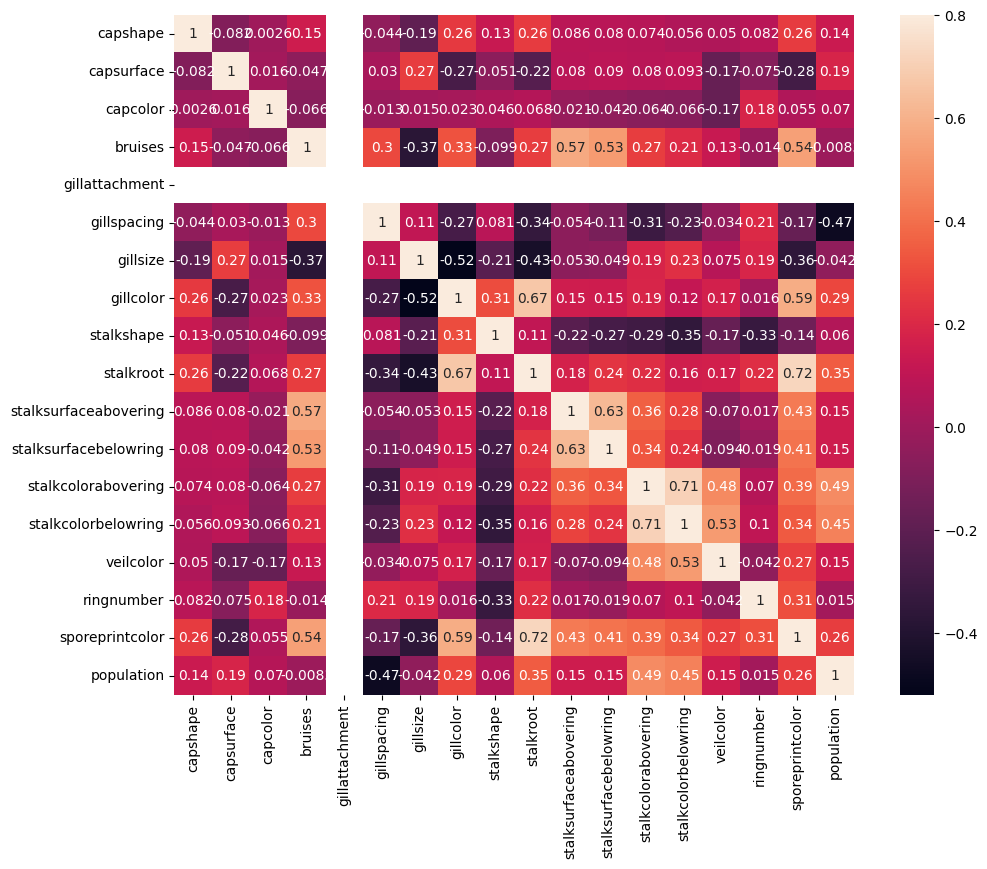

In [78]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

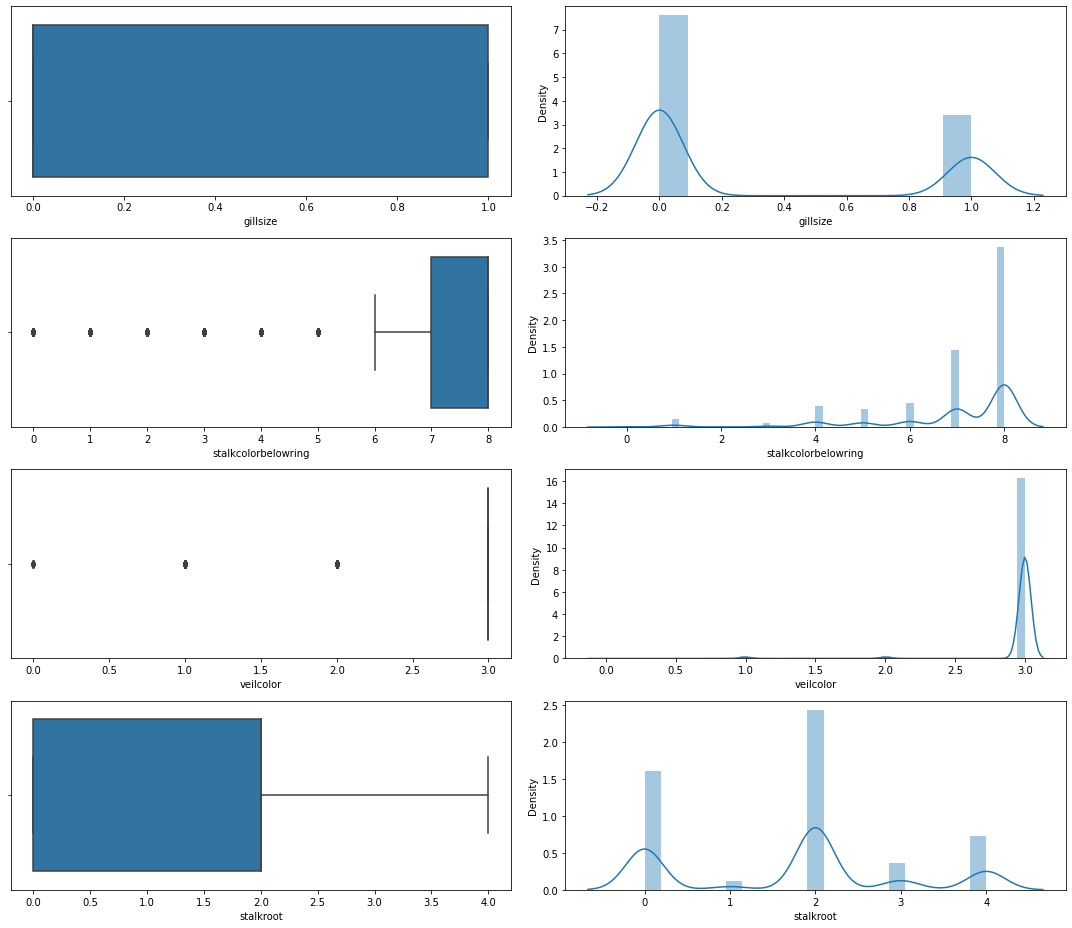

In [80]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= df_train["gillsize"], ax = ax[0,0])
sns.distplot(df_train['gillsize'], ax = ax[0,1])
sns.boxplot(x= df_train["stalkcolorbelowring"], ax = ax[1,0])
sns.distplot(df_train['stalkcolorbelowring'], ax = ax[1,1])
sns.boxplot(x= df_train["veilcolor"], ax = ax[2,0])
sns.distplot(df_train['veilcolor'], ax = ax[2,1])
sns.boxplot(x= df_train["stalkroot"], ax = ax[3,0])
sns.distplot(df_train['stalkroot'], ax = ax[3,1])
plt.tight_layout()

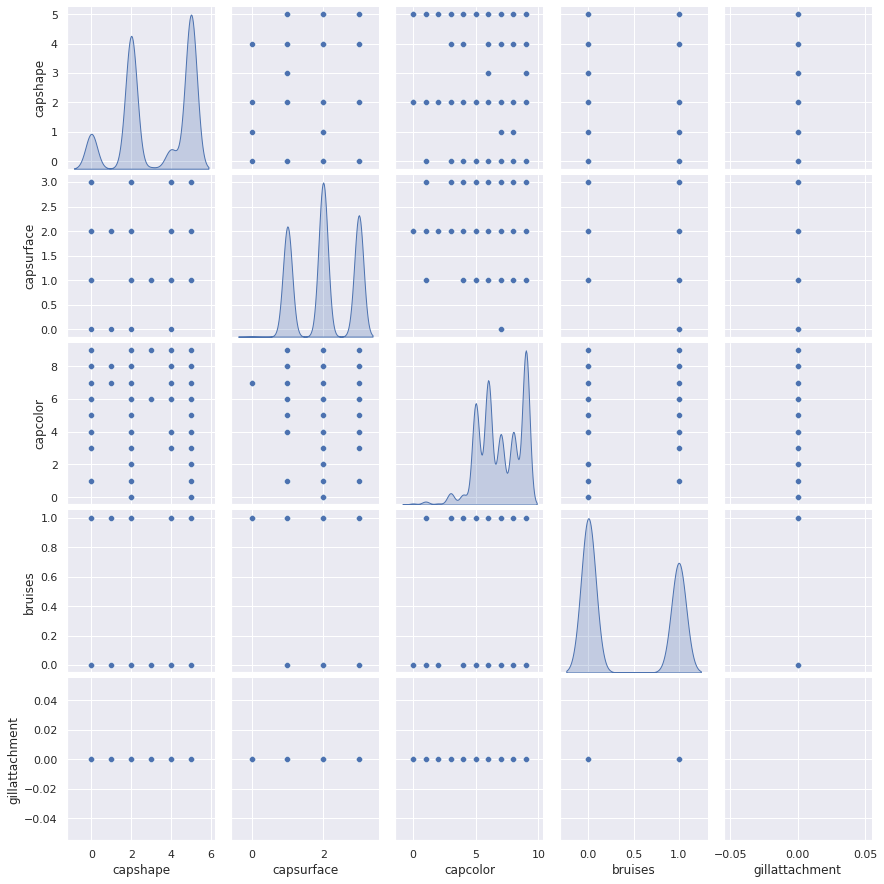

In [81]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [118]:
X = df_train.drop(['class','veiltype','gillattachment'], axis = 1)
Y = df_train["class"]
x_Data = X.values
y_Data = Y.values

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [122]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [123]:
model.score(X_test,y_test)

0.9218461538461539

In [124]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.92153846 0.93692308 0.92384615 0.92230769 0.9160893 ]


In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [126]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.9246037851977227

In [127]:
confusion_matrix(y_train, pred)

array([[3310,   55],
       [ 435, 2699]])

In [128]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [129]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [130]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           e       0.88      0.98      0.93       843
           p       0.98      0.86      0.91       782

    accuracy                           0.92      1625
   macro avg       0.93      0.92      0.92      1625
weighted avg       0.93      0.92      0.92      1625



In [131]:
cma = confusion_matrix(y_test, predicted_test)

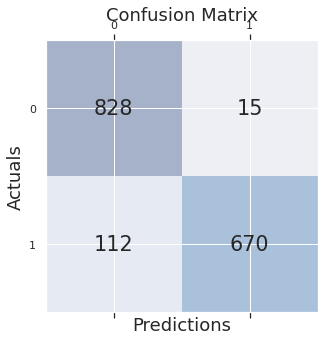

In [132]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier as rf

In [134]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [135]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

1.0

In [136]:
confusion_matrix(y_train, pred)

array([[3365,    0],
       [   0, 3134]])

In [137]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [138]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [139]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [140]:
cma = confusion_matrix(y_test, pred_test)

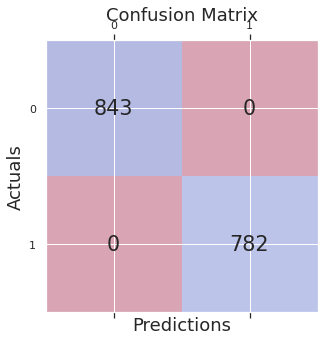

In [141]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [150]:
from sklearn import tree

In [151]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [152]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [153]:
confusion_matrix(y_train, pred1)

array([[3365,    0],
       [   0, 3134]])

In [154]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [155]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [156]:
cma = confusion_matrix(y_test, pred1_test)

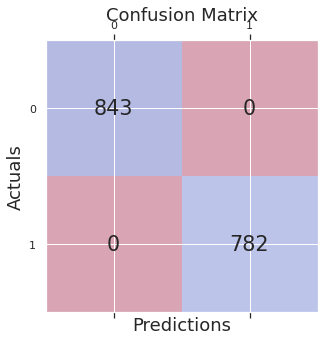

In [157]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [159]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.985536236344053

In [160]:
confusion_matrix(y_train, pred_LR)

array([[3312,   53],
       [  41, 3093]])

In [161]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [162]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           e       0.99      0.97      0.98       843
           p       0.97      0.99      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [163]:
cma = confusion_matrix(y_test, pred_LR_test)

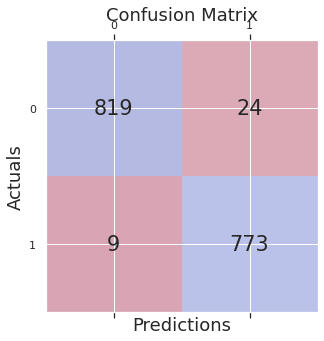

In [164]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [165]:
from sklearn.neural_network import MLPClassifier

In [166]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [167]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.998461301738729

In [168]:
confusion_matrix(y_train, pred_NN)

array([[3365,    0],
       [  10, 3124]])

In [169]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [170]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [171]:
cma = confusion_matrix(y_test, pred_NN_test)

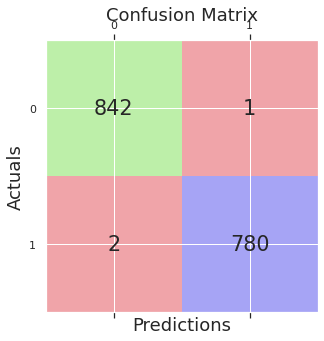

In [172]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [173]:
import xgboost as xgb

In [174]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [175]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

1.0

In [176]:
confusion_matrix(y_train, pred_XGB)

array([[3365,    0],
       [   0, 3134]])

In [177]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [178]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [179]:
cma = confusion_matrix(y_test, pred_XGB_test)

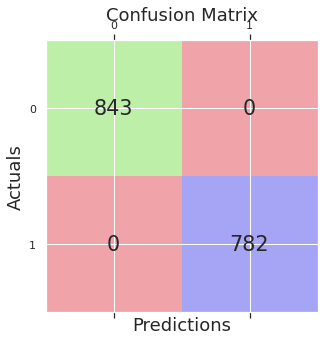

In [180]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

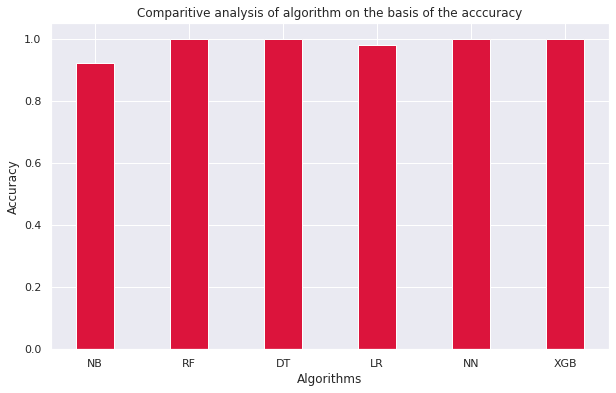

In [181]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


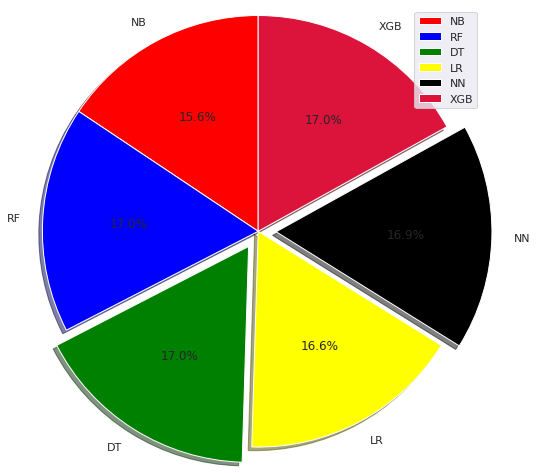

In [182]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [183]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']